# Filtering
Filter NumPy data for specific values.

## A. Filtering data
Sometimes we have data that contains values we don't want to use. For example, when tracking the best hitters in baseball, we may want to only use the batting average data above .300. In this case, we should filter the overall data for only the values that we want.

The key to filtering data is through basic relation operations, e.g. ==, >, etc. In NumPy, we can apply basic relation operations element-wise on arrays.

The code below shows relation operations on NumPy arrays. The ~ operation represents a boolean negation, i.e. it flips each truth value in the array.

In [1]:
import numpy as np

arr = np.array([[0, 2, 3],
                [1, 3, -6],
                [-3, -2, 1]])
print(repr(arr == 3))
print(repr(arr > 0))
print(repr(arr != 1))
# Negated from the previous step
print(repr(~(arr != 1)))

array([[False, False,  True],
       [False,  True, False],
       [False, False, False]])
array([[False,  True,  True],
       [ True,  True, False],
       [False, False,  True]])
array([[ True,  True,  True],
       [False,  True,  True],
       [ True,  True, False]])
array([[False, False, False],
       [ True, False, False],
       [False, False,  True]])


Something to note is that np.nan can't be used with any relation operation. Instead, we use np.isnan to filter for the location of np.nan.

The code below uses np.isnan to determine which locations of the array contain np.nan values.

In [2]:
arr = np.array([[0, 2, np.nan],
                [1, np.nan, -6],
                [np.nan, -2, 1]])
print(repr(np.isnan(arr)))

array([[False, False,  True],
       [False,  True, False],
       [ True, False, False]])


Each boolean array in our examples represents the location of elements we want to filter for. The way we perform the filtering itself is through the np.where function.

## B. Filtering in NumPy
The np.where function takes in a required first argument, which is a boolean array where True represents the locations of the elements we want to filter for. When the function is applied with only the first argument, it returns a tuple of 1-D arrays.

The tuple will have size equal to the number of dimensions in the data, and each array represents the True indices for the corresponding dimension. Note that the arrays in the tuple will all have the same length, equal to the number of True elements in the input argument.

The code below shows how to use np.where with a single argument.

In [3]:
print(repr(np.where([True, False, True])))

arr = np.array([0, 3, 5, 3, 1])
print(repr(np.where(arr == 3)))

arr = np.array([[0, 2, 3],
                [1, 0, 0],
                [-3, 0, 0]])
x_ind, y_ind = np.where(arr != 0)
print(repr(x_ind)) # x indices of non-zero elements
print(repr(y_ind)) # y indices of non-zero elements
print(repr(arr[x_ind, y_ind]))

(array([0, 2], dtype=int64),)
(array([1, 3], dtype=int64),)
array([0, 0, 1, 2], dtype=int64)
array([1, 2, 0, 0], dtype=int64)
array([ 2,  3,  1, -3])


The interesting thing about np.where is that it must be applied with exactly 1 or 3 arguments. When we use 3 arguments, the first argument is still the boolean array. However, the next two arguments represent the True replacement values and the False replacement values, respectively. The output of the function now becomes an array with the same shape as the first argument.

The code below shows how to use np.where with 3 arguments.

In [4]:
np_filter = np.array([[True, False], [False, True]])
positives = np.array([[1, 2], [3, 4]])
negatives = np.array([[-2, -5], [-1, -8]])
print(repr(np.where(np_filter, positives, negatives)))

np_filter = positives > 2
print(repr(np.where(np_filter, positives, negatives)))

np_filter = negatives > 0
print(repr(np.where(np_filter, positives, negatives)))

array([[ 1, -5],
       [-1,  4]])
array([[-2, -5],
       [ 3,  4]])
array([[-2, -5],
       [-1, -8]])


Note that our second and third arguments necessarily had the same shape as the first argument. However, if we wanted to use a constant replacement value, e.g. -1, we could incorporate broadcasting. Rather than using an entire array of the same value, we can just use the value itself as an argument.

The code below showcases broadcasting with np.where.

In [5]:
np_filter = np.array([[True, False], [False, True]])
positives = np.array([[1, 2], [3, 4]])
print(repr(np.where(np_filter, positives, -1)))

array([[ 1, -1],
       [-1,  4]])


## C. Axis-wise filtering
If we wanted to filter based on rows or columns of data, we could use the np.any and np.all functions. Both functions take in the same arguments, and return a single boolean or a boolean array. The required argument for both functions is a boolean array.

The code below shows usage of np.any and np.all with a single argument.

In [6]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
print(repr(arr > 0))
print(np.any(arr > 0))
print(np.all(arr > 0))

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True]])
True
False


The np.any function is equivalent to performing a logical OR (||), while the np.all function is equivalent to a logical AND (&&) on the first argument. np.any returns true if even one of the elements in the array meets the condition and np.all returns true only if all the elements meet the condition. When only a single argument is passed in, the function is applied across the entire input array, so the returned value is a single boolean.

However, if we use a multi-dimensional input and specify the axis keyword argument, the returned value will be an array. The axis argument has the same meaning as it did for np.argmin and np.argmax from the previous chapter. Using axis=0 means the function finds the index of the minimum row element for each column. When we used axis=1, the function finds the index of the minimum column element for each row.

Setting axis to -1 just means we apply the function across the last dimension.

The code below shows examples of using np.any and np.all with the axis keyword argument.

In [7]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
print(repr(arr > 0))
print(repr(np.any(arr > 0, axis=0)))
print(repr(np.any(arr > 0, axis=1)))
print(repr(np.all(arr > 0, axis=1)))

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True]])
array([ True,  True,  True])
array([False,  True,  True])
array([False, False,  True])


We can use np.any and np.all in tandem with np.where to filter for entire rows or columns of data.

In the code example below, we use np.any to obtain a boolean array representing the rows that have at least one positive number. We then use the boolean array as the input to np.where, which gives us the actual indices of the rows with at least one positive number.
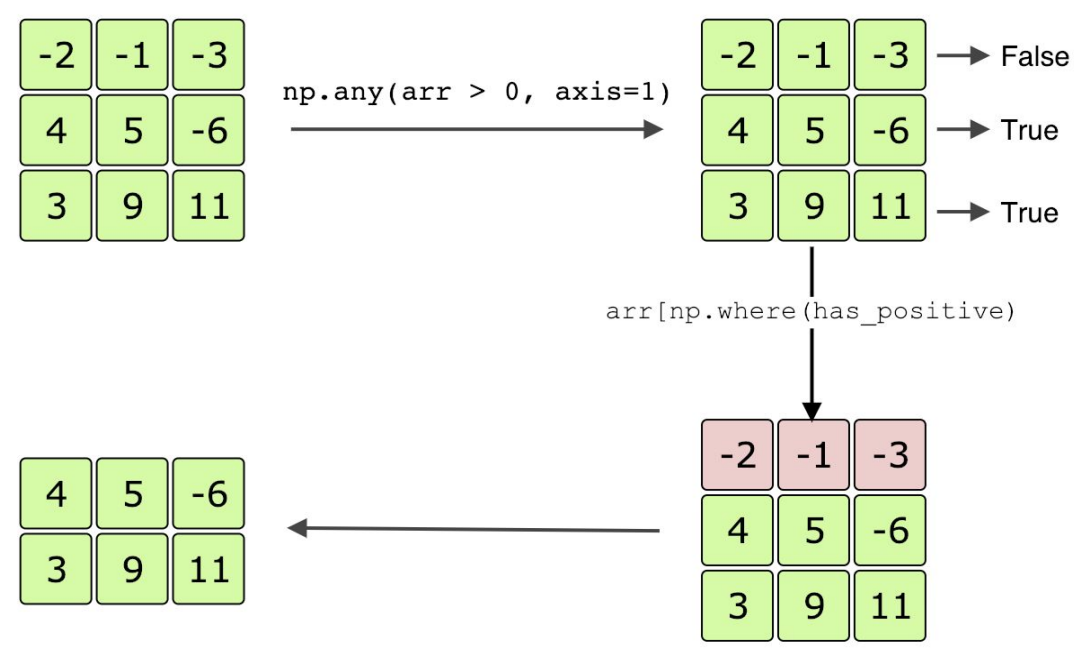

In [8]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
has_positive = np.any(arr > 0, axis=1)
print(has_positive)
print(repr(arr[np.where(has_positive)]))

[False  True  True]
array([[ 4,  5, -6],
       [ 3,  9,  1]])
